# Time Series Project (NAME TBD)

---

**Project & Final Report Created By:** Mathias Boissevain & Rachel Robbins-Mayhill, April 22, 2022

---

5 POINTS -> GENERAL STYLE
- Does your notebook have a good title? 
- Does the readme provide a description of the project and instructions on running your code? 
- Are headings used to organize the notebook? 
- Is the text free from grammatical and spelling errors?

5 POINTS -> CODE STYLE
- Is the code well commented / documented? 
- Do functions and variables have descriptive names? 
- Is code broken up into functions / modules appropriately? - Is the code formatting consistent?

10 POINTS -> ACQUISITION & PREPARATION
- Is data from the relevant tables included? 
- Is the data wrangling easily reproducible? 
- Can I import a function from an acquire/prep/wrangle module and have it give me the prepared data? 
- Are the steps taken for data acquisition and preparation well documented in the report notebook?

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
import squarify

# Import for acquisition
import env
import os
import wrangle

# Add for setting to see all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## PROJECT DESCRIPTION:

Superstore's mission is to be the preferred supplier of workspace solutions; from home-office to corporate office, we aspire to be the leading expert in workplace solutions for everyone! For this reason, it is important to know whether we are reaching everyone with our products and services. 
This project will use exploration, modeling, and statistics to identify the best customer segment for Superstore, an office supply retail store, in regards to profitability and will provide recommendations on where to shift the company focus in order to maintain happy loyal customers while continuing to grow the customer base.

## PROJECT GOAL: 

The goal of this project is to identify which of Superstore's customer segments is the best in regards to profitability, and make recommendations on where to shift company focus in regards to customer segments. 

## INITIAL QUESTIONS: 

##### Data-Focused Questions
- What customer base contributes the most to profit?
- What customer base contributes the most to sales?
- How does the impact of each customer segment change over time?
- What is our total revenue?
- What amount of revenue is impacted by each customer segment?

##### Overall Project-Focused Questions
- What will the end product look like?
   + 5-minute presentation to key stakeholder, with best customer segment identified and recommendation given on where to shift company focus.
- What format will it be in?
   + Slide format, with agenda, executive summary, data overview, and recommendations along with Github Repo.
- Who will it be delivered to?
   + Company CEO
- How will it be used?
   + To recommend steps to take in order to grow customer segment________ .
- How will I know I'm done?
   + When customer segment impact and recommendation have been identified, along with deliverables complete.
- What is my MVP?
   + Identify best customer segment in regards to ONE of the following areas (sales volume, total profit, % profit, or sales growth). 
- How will I know it's good enough?
   + If the exploratory process produces data-backed results outlining the 'best' customer segment along with an avenue for improving company profits. 

## HYPOTHESIS:
- Which customer segment is the best?
   + H0: The consumer customer segment's profit is <= the profit of all other customer segments.
   + H1: The consumer customer segment's profit is > the profit of all other customer segments.

---

## I. ACQUIRE

The data for this report was acquired by accessing 'superstore_db' from the Codeup SQL database. The following query was used to acquire the data:

    SELECT *
    FROM orders
    JOIN categories
    USING(`Category ID`)
    JOIN customers
    USING(`Customer ID`)
    JOIN products
    USING(`Product ID`)
    JOIN regions
    USING(`Region ID`)

### The Original DataFrame Size: 1734 rows and 22 columns.

The acquisition of this data can be replicated using the following function saved within the wrangle.py file inside the 'mwb-rrm-codeup-time-series-project' repository on GitHub:

- get_superstore(use_cache=True)  

The function receives a boolean as input to see if the user wants to receive a fresh copy of the data from the database. Then it checks to see if the file being requested already exists as a local .csv. It runs a query for the data using the assigned url, creates a new .csv if needed, then returns the superstore dataframe.

For succinctness of this report, the acquisition and preparation calls are done together in the Section II. Prepare. 


========================================================================================

## II. PREPARE

After data acquisition, the table was analyzed and cleaned to facilitate functional exploration, clarify confusion, and standardize datatypes. 

The preparation of this data can be replicated using the following function saved within the wrangle.py file inside the 'mwb-rrm-codeup-time-series-project' repository on GitHub. 

- prep_superstore

The function takes in the original superstore dataframe and returns it with the changes noted below.

### Steps Taken to Clean & Prepare Data: 

- Removed unnecessary columns due to data duplication: region_id, product_id, category_id, customer_id
 
- Formatted column names to lower case while replacing spaces with underscores for ease of use thorugh exploration

- Set date columns to datetime type for use with time series analysis: order_date, ship_date

- Set order_date as index and sort by index for time series analysis

- Set postal code to object type for ease of exploration and potential modeling

- Engineered column for the number of days it takes to ship from the order date for potential exploration

- Create year column from index for data exploration

- It was identified there were no null values

---

### Results of Data Preparation

In [2]:
#Acquire the superstore_db data using wrangle.get_superstore passed into the wrangle.prep_superstore function, which will prepare the dataset.
df = wrangle.prep_superstore(wrangle.get_superstore())

In [3]:
# Inspect df
df.head().T

order_date,2014-01-04,2014-01-04,2014-01-04,2014-01-09,2014-01-09
unnamed:_0,977,978,979,942,941
order_id,CA-2014-112326,CA-2014-112326,CA-2014-112326,CA-2014-135405,CA-2014-135405
ship_date,2014-01-08 00:00:00,2014-01-08 00:00:00,2014-01-08 00:00:00,2014-01-13 00:00:00,2014-01-13 00:00:00
ship_mode,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class
segment,Home Office,Home Office,Home Office,Consumer,Consumer
country,United States,United States,United States,United States,United States
city,Naperville,Naperville,Naperville,Laredo,Laredo
state,Illinois,Illinois,Illinois,Texas,Texas
postal_code,60540.0,60540.0,60540.0,78041.0,78041.0
sales,11.784,272.736,3.54,31.2,9.344


In [4]:
df.index.min(), df.index.max()

(Timestamp('2014-01-04 00:00:00'), Timestamp('2017-12-30 00:00:00'))

---

### Prepared DataFrame Size: 1734 rows, 20 columns, spanning 3 years 2014-2017
- Dropped 4 columns, added 2
- Spanning time from 01-04-2014 to 12-30-2017 (3 years)

---

##### ** Note on Data Split** 
The data was not split at this point because modeling because the most recent year of data is valuable in understanding the customer segment profit over time. A data split will happen later in the process to provide a model of what the profit trajectory could have been if the identified problem did not arise. 

========================================================================================

## III. EXPLORE

### EXPLORE - Questions

1. Who are our Customers?
2. What does profit look like over time?
3. What customer base contributes the most to profit over time?
4. What is the profit per customer segment over time?


Exploration started with looking at the distribution of profit and the distribution of our customer segments.

10 POINTS
- Are figures well labeled (title, x + y labels)? 
- Does the type of visualization make sense for the variables being explored? 
- Is color used in an appropriate way? 
- Are takeaways documented? 
- Are questions asked and answered? 
- Are statistical tests used appropriately to back up conclusions?

---

### QUESTION 1: Who are our customers?

#### UNIVARIATE:

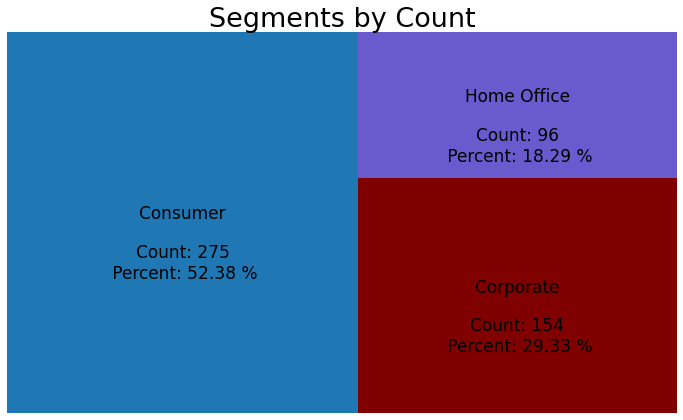

In [13]:

# Assign Counts of Customers to each segement
con_count = len(df.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Consumer')])
cor_count = len(df.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Corporate')])
hom_count = len(df.groupby(by=['segment','customer_name']).segment.value_counts().loc[('Home Office')])
segment_counts = [con_count,cor_count,hom_count]

# Assign segment percentages
seg_percent = []

for x in segment_counts:
    seg_percent.append(f'\nCount: {x}\n Percent: {round(x / sum(segment_counts) * 100,2)} %')
    
seg_percent
# Assign figure size
plt.figure(figsize=(12,7))
# Use Squarify to create a tree map of segment counts
squarify.plot(sizes=segment_counts, 
              label=list(df.segment.value_counts().index),
              value=seg_percent,
              color = ['tab:blue','maroon','slateblue'],
              text_kwargs={'fontsize': 17})
# Assign titles
plt.title('Segments by Count', fontsize=27)
plt.axis('off')
plt.show()

Observations: 
- Consumer -> 52%
- Corporate -> 29%
- Home Office -> 18%

### ANSWER 1: Our largest customer base is Consumer, followed by Corporate, then Home Office.

---

#### BIVARIATE:

### QUESTION 2: What does profit look like over time?

#### Profit (target) Over Time

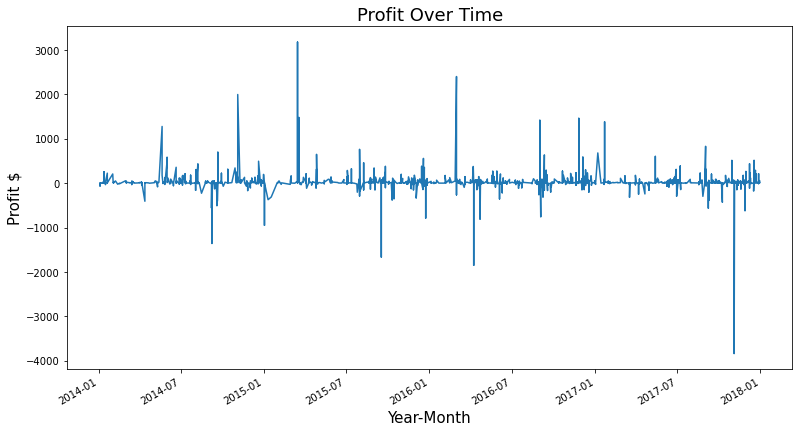

In [6]:
y = df.profit
plt.figure(figsize = (13,7))
y.plot()
plt.title('Profit Over Time', fontsize = 18)
plt.xlabel('Year-Month', fontsize = 15)
plt.ylabel('Profit $', fontsize = 15)
plt.rc('figure', figsize=(12, 5))
plt.rc('font', size=10)
plt.style.use('bmh')
plt.show() 

Observations: 
- There appear to be profit spikes between March and April each year.
- There appears to be profit dips in September and October each year.
- There was a significant loss in October/November of 2018.

### ANSWER 2:  Profit has consistent seasonailty from 01/2014 - 09/2017, followed by a significant drop in 10-11/2018.

---

#### Multivariate:

### QUESTION 3: What customer base contributes the most to profit over time?

In [7]:
monthly_profit = (
    df[['profit','segment']]
    .groupby('segment')
    .resample('M')
    .profit.sum()
    .unstack(0)
)

Text(0.5, 1.0, '% Profit By Segment Type Over Time')

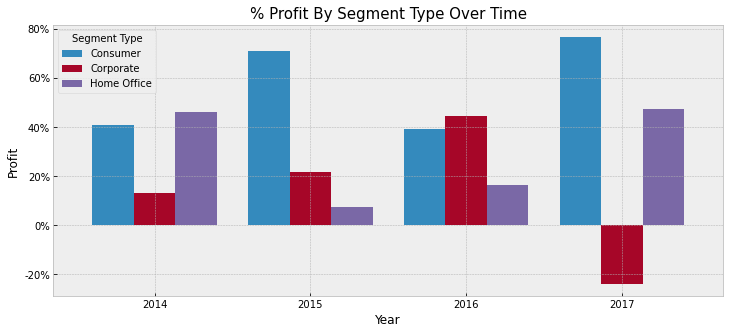

In [33]:
from matplotlib.ticker import StrMethodFormatter

ax = (
    monthly_profit.resample('Y')
    .sum()
    .apply(lambda row: row / row.sum(),axis = 1)
    .plot.bar(width=.8)
)
ax.legend(loc='upper left', title='Segment Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='Profit', xlabel='Year')
ax.set_title('% Profit By Segment Type Over Time', size= 15)

### ANSWER 3: Consumer segment has historically contributed most consistently to profit over time, but there has been steady growth in the Corporate segment until 2017, when it produced over a 20% loss. The Home Office segment has been recovering and growing since the drop in 2015. 

---

### Question 4:  How does profit by customer segment trend over time?

##### Visualization:

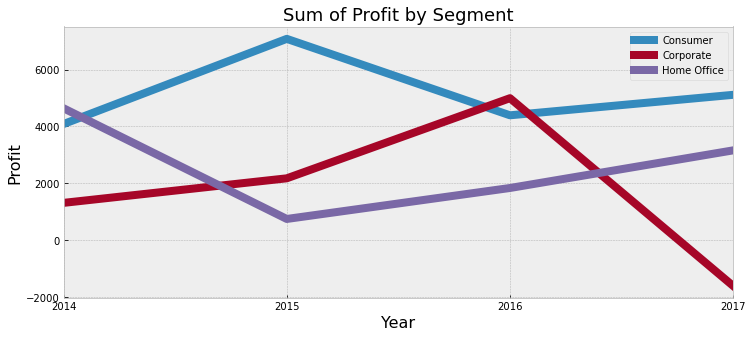

In [19]:
year_ssdb = df.groupby(by='segment').resample('Y').sum()
year_ssdb.index = year_ssdb.index.set_names(['segment','order_dates'])

year_ssdb.loc[('Consumer')]['profit'].plot(label='Consumer',linewidth=8)
year_ssdb.loc[('Corporate')]['profit'].plot(label='Corporate',linewidth=8)
year_ssdb.loc[('Home Office')]['profit'].plot(label='Home Office',linewidth=8)

leg = plt.legend()

leg.get_lines()[0].set_linewidth(8)
leg.get_lines()[1].set_linewidth(8)
leg.get_lines()[2].set_linewidth(8)

plt.title('Sum of Profit by Segment', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit', fontsize = 16)
plt.show()

##### Stats Testing:

### Answer 4: 
- Consumer profit has consistently been above \\$4000 annually.
- Corporate profit had been building from \\$1800 to \\$5000 annually between 2014-2016, it then dropped to \\$-1800 in 2017. 
- Home Office profit has grown steadily after dropping between 2014 and 2015 from \\$1000 - \\$3500 annually between 2015-2017. 

---

 ### QUESTION 5: What customer base contributes the most to sales over time?

##### Visualization:

In [26]:
monthly_sales = (
    df[['sales','segment']]
    .groupby('segment')
    .resample('M')
    .sales.sum()
    .unstack(0)
)

[Text(0, 0.5, 'Sales $'),
 Text(0.5, 1.0, '$ Sales By Segment Type Over Time'),
 Text(0.5, 0, 'Year')]

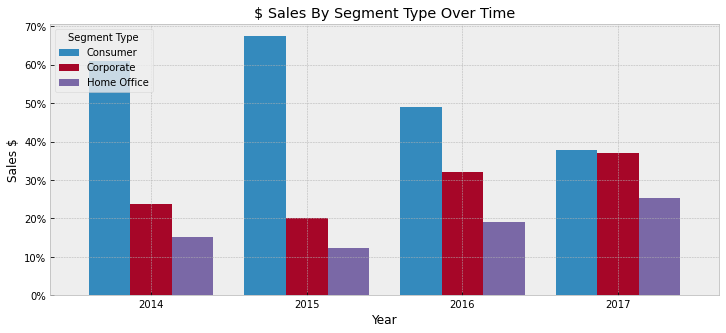

In [27]:
ax = (
    monthly_sales.resample('Y')
    .sum()
    .apply(lambda row: row / row.sum(),axis = 1)
    .plot.bar(width=.8)
)
ax.legend(loc='upper left', title='Segment Type')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0%}'))
labels = [pd.to_datetime(t.get_text()).strftime('%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=0)
ax.set(ylabel='Sales $', title='$ Sales By Segment Type Over Time', xlabel='Year')

##### Stats Testing:

#### Answer 5: 

---

### Question 6: What is the sales per customer segment over time?

##### Visualization:

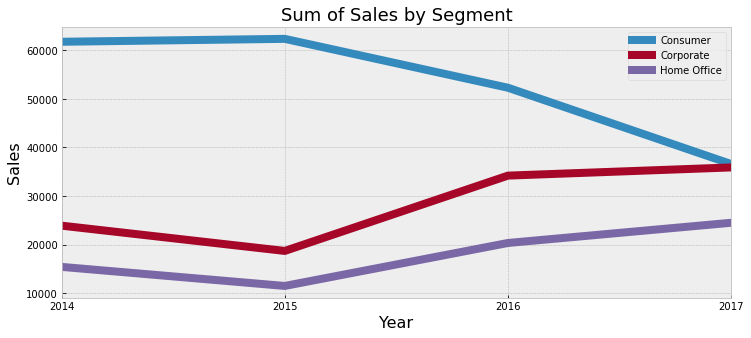

In [20]:
year_ssdb = df.groupby(by='segment').resample('Y').sum()
year_ssdb.index = year_ssdb.index.set_names(['segment','order_dates'])

year_ssdb.loc[('Consumer')]['sales'].plot(label='Consumer',linewidth=8)
year_ssdb.loc[('Corporate')]['sales'].plot(label='Corporate',linewidth=8)
year_ssdb.loc[('Home Office')]['sales'].plot(label='Home Office',linewidth=8)

leg = plt.legend()

leg.get_lines()[0].set_linewidth(8)
leg.get_lines()[1].set_linewidth(8)
leg.get_lines()[2].set_linewidth(8)

plt.title('Sum of Sales by Segment',fontsize = 18 )
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.show()

##### Stats Testing:

### Answer 6: 

---

### Question 7: What impacted Corporate Profit in 2017?

##### Visualization:

##### Stats Testing:

#### Answer: 

---

### EXPLORATION TAKEAWAYS

Through exploration, we could see the Consumer segment is our largest segment by count and percentage. Although total sales within the Consumer segment has decreased by nearly 50% between 2015 and 2017, profit has remained fairly steady above 4000 USD annually. Corportate sales and profit had been growing between 2015 and 2016, and sales remained steady at in the 350K USD range in 2018 while also restuling in resulting in a significant profit loss.  After a slight decline in sales, and a significant decline in profit from the Home Office segment between 2014 and 2015, it has demonstrated consistent growth and recovery in both sales and profit from 2015 - 2018. Through exploration we were able to answer the following questions:

1: Who are our customers?
- ANSWER: Our largest customer base is Consumer, followed by Corporate, then Home Office.


---

---

### PREPARE - SPLIT the DATA

After preparing the data, it was split in the following way using a percentage-based method: 
    
    - Train -> 50% 
    - Validate -> 30%  
    - Test -> 20% of the original dataset
    
The split of this data can be replicated using the following function saved within the wrangle.py file inside the 'mwb-rrm-codeup-time-series-project' repository on GitHub.

split_superstore

The function takes in a df and returns three samples of the data for train, validate and test.

In [11]:
train, validate, test = wrangle.split_superstore(df)

Train: 867 rows, 20 cols
Validate: 520 rows, 20 cols
Test: 347 rows, 20 cols


## MODELING (OPTIONAL)

---

# CONCLUSION

### Summary

The goal of this report was to identify which customer segment is the best for SuperStore and make recommendations on where to shift company focus in regards to customer segment. We measured the term 'best' in relation to profitabiltiy. Through exploration, it was determined the best customer segment is _____________________. 

---

## RECOMMENDATIONS

10 POINTS -> RECOMMENDATIONS
- Are recommendations that answer the original business question present, 
- clearly communicated, 
- backed by data, 
- and supported by visualizations?

---

## NEXT STEPS

If given more time, further exploration would be beneficial in the following areas:
- What are drivers of the decrease in consumer spending? 

- Why were there significant corporate losses in 2016?

- What products contribute most to profit across each customer segment?

- What products contribute most to loss across each customer segment?